<a href="https://colab.research.google.com/github/Chanjinee/Project/blob/main/Text%20mining/%EC%98%A4%EB%8A%98%EC%9D%98%20%EC%A7%91%20%ED%81%AC%EB%A1%A4%EB%A7%81%26wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install selenium

In [3]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
!apt-get update
!apt install chromium-chromedriver

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 웹드라이버를 브라우저 없이 실행
chrome_options.add_argument('--no-sandbox') # 보안기능 비활성화
chrome_options.add_argument('--disable-dev-shm-usage') # dev-shm을 사용 X
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options) # 공유메모리 담당

In [6]:
tags = ['popular', 'best', 'recent']
urls = []
for tag in tags:
  # 수집하고자하는 주소
  driver.get("https://ohou.se/projects?writer=self&order=" + tag)
  time.sleep(2)
  for i in range(12):
    url = driver.find_elements(by=By.CSS_SELECTOR, value='a.project-feed__item__link')[i].get_attribute('href')
    urls.append(url)
print(urls)

['https://ohou.se/projects/62650/detail?affect_type=ProjectSelfIndex&affect_id=0', 'https://ohou.se/projects/62097/detail?affect_type=ProjectSelfIndex&affect_id=1', 'https://ohou.se/projects/62721/detail?affect_type=ProjectSelfIndex&affect_id=2', 'https://ohou.se/projects/62607/detail?affect_type=ProjectSelfIndex&affect_id=3', 'https://ohou.se/projects/61960/detail?affect_type=ProjectSelfIndex&affect_id=4', 'https://ohou.se/projects/62601/detail?affect_type=ProjectSelfIndex&affect_id=5', 'https://ohou.se/projects/62195/detail?affect_type=ProjectSelfIndex&affect_id=6', 'https://ohou.se/projects/62655/detail?affect_type=ProjectSelfIndex&affect_id=7', 'https://ohou.se/projects/61851/detail?affect_type=ProjectSelfIndex&affect_id=8', 'https://ohou.se/projects/63079/detail?affect_type=ProjectSelfIndex&affect_id=9', 'https://ohou.se/projects/62190/detail?affect_type=ProjectSelfIndex&affect_id=10', 'https://ohou.se/projects/62784/detail?affect_type=ProjectSelfIndex&affect_id=11', 'https://ohou

In [ ]:
import pandas as pd
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup

In [8]:
# 저장할 데이터 프레임 생성
data = pd.DataFrame(data=[], columns=['순위', '날짜', '제목', '아이디', '거주구분', '평수', '지역', '스타일', '포스팅내용'])

In [15]:
def collector(url, data, k):
  req = requests.get(url)
  # 크롤링을 위한 준비
  soup = BeautifulSoup(req.text, 'html.parser')

  # 수집할 내용들
  date = soup.select('div.content-detail-header__author-date')[0].text.replace(' ','') # 날짜 / 공백 없애줌
  title = soup.select('h1')[0].text # 제목
  id = soup.select('div.content-detail-header__author-name')[0].text # 아이디
  ## 태그에서 찾기
  dt = [t.text for t in soup.select('div.project-detail-metadata-detail-item > dt')]
  dd = [t.text for t in soup.select('div.project-detail-metadata-detail-item > dd')]
  # 거주공간
  try: cat = dd[dt.index('공간')] 
  except: cat = None
  # 평수
  try: size = dd[dt.index('평수')]
  except: size = None
  # 지역
  try: city = dd[dt.index('지역')]
  except: city = None
  # 스타일
  try: style = dd[dt.index('스타일')]
  except: style = None
  p = [soup.select('p')[i].text.replace('\xa0',' ').replace("\r","").replace("\n","").replace("'","") for i in range(1,len(soup.select('p'))-1)] # 포스팅 내용
  p = ' '.join(p)

  # data에 저장
  temp = []
  temp.append((k, date,title,id,cat,size,city,p))
  temp = pd.DataFrame(temp, columns=('순위','날짜','제목','아이디','거주구분', '평수', '지역', '포스팅내용'))
  data = pd.concat([data,temp])

  print(str(k+1) + '번째 포스팅글 수집 끝')
  
  return data

In [16]:
for k,url in tqdm(enumerate(urls)):
  data = collector(url,data,k)
data = data.reset_index()

1it [00:10, 10.99s/it]

1번째 포스팅글 수집 끝


2it [00:16,  7.80s/it]

2번째 포스팅글 수집 끝


3it [00:24,  7.77s/it]

3번째 포스팅글 수집 끝


4it [00:37,  9.80s/it]

4번째 포스팅글 수집 끝


5it [00:43,  8.69s/it]

5번째 포스팅글 수집 끝


6it [00:51,  8.19s/it]

6번째 포스팅글 수집 끝


7it [01:00,  8.61s/it]

7번째 포스팅글 수집 끝


8it [01:08,  8.42s/it]

8번째 포스팅글 수집 끝


9it [01:14,  7.49s/it]

9번째 포스팅글 수집 끝


10it [01:25,  8.82s/it]

10번째 포스팅글 수집 끝


11it [01:29,  7.34s/it]

11번째 포스팅글 수집 끝


12it [01:41,  8.69s/it]

12번째 포스팅글 수집 끝


13it [01:44,  7.06s/it]

13번째 포스팅글 수집 끝


14it [01:57,  8.75s/it]

14번째 포스팅글 수집 끝


15it [02:08,  9.29s/it]

15번째 포스팅글 수집 끝


16it [02:09,  7.04s/it]

16번째 포스팅글 수집 끝


17it [02:13,  6.09s/it]

17번째 포스팅글 수집 끝


18it [02:15,  4.81s/it]

18번째 포스팅글 수집 끝


19it [02:25,  6.35s/it]

19번째 포스팅글 수집 끝


20it [02:31,  6.18s/it]

20번째 포스팅글 수집 끝


21it [02:32,  4.80s/it]

21번째 포스팅글 수집 끝


22it [02:35,  4.18s/it]

22번째 포스팅글 수집 끝


23it [02:40,  4.35s/it]

23번째 포스팅글 수집 끝


24it [02:43,  4.05s/it]

24번째 포스팅글 수집 끝


25it [02:50,  4.95s/it]

25번째 포스팅글 수집 끝


26it [02:58,  5.76s/it]

26번째 포스팅글 수집 끝


27it [03:06,  6.52s/it]

27번째 포스팅글 수집 끝


28it [03:10,  5.53s/it]

28번째 포스팅글 수집 끝


29it [03:14,  5.28s/it]

29번째 포스팅글 수집 끝


30it [03:19,  5.19s/it]

30번째 포스팅글 수집 끝


31it [03:23,  4.91s/it]

31번째 포스팅글 수집 끝


32it [03:33,  6.43s/it]

32번째 포스팅글 수집 끝


33it [03:38,  5.98s/it]

33번째 포스팅글 수집 끝


34it [03:48,  7.15s/it]

34번째 포스팅글 수집 끝


35it [03:55,  6.88s/it]

35번째 포스팅글 수집 끝


36it [04:00,  6.69s/it]

36번째 포스팅글 수집 끝


In [17]:
data

,level_0,index,순위,날짜,제목,아이디,거주구분,평수,지역,스타일,포스팅내용
0,0,0.0,0,21.10.06,"계획서만 50장! 내 머릿 속 인테리어,그대로 실현하기",to-mohome,아파트,33평,대구광역시 달성군,NaN,"안녕하세요. 오늘의 집에 첫 집들이를 소개하게 된 ""투모""입니다. 얼마 전 새로 이..."
1,1,0.0,1,21.10.06,"온전한 쉼을 위해, 취향으로 가득 채운 옐로우 하우스",alderdn,원룸&오피스텔,10평,경기도 성남시,NaN,안녕하세요. 유전공학 분야에서 연구원으로 일하고 있는 알데입니다. 저는 프로 집순...
2,2,0.0,2,21.10.06,"20년이 넘은 복도식 아파트, 반셀프로 단정하게 고치기",E.T.CITY,아파트,22평,서울특별시,NaN,안녕하세요 저희는 이번 5월에 결혼해서 따끈따끈한 일상을 보내고 있는 은또네입니다 ...
3,3,0.0,3,21.10.12,"휴양지의 정갈한 호텔 느낌, 설렘과 쉼을 주는 집🌴",juju____home,아파트,56평,None,NaN,안녕하세요. 해맑은 웃음을 지닌 6살 딸아이와 함께하는 결혼 10년 차 부부입니다....
4,4,0.0,4,21.10.02,최소한의 시공으로 취향을 가득담은 신혼집,난아링,아파트,25평,서울특별시 강동구,NaN,안녕하세요! 저희는 여행과 캠핑을 좋아하는 결혼 3년 차 신혼부부입니다. 야외생활을...
...,...,...,...,...,...,...,...,...,...,...,...
67,0,NaN,31,1일전,"화이트지만 너무 차갑지 않게, 20평대 신혼집 리모델링",리미콩43,아파트,25평,경기도 용인시,NaN,안녕하세요. 저희는 다가오는 6월에 곧 식을 올릴 예비 신혼부부입니다. 어쩌다 보니...
68,0,NaN,32,1일전,"어서오세요, 퍼플 포레스트에! 보라색으로 꾸민 원룸💜",Purple_forest,원룸&오피스텔,8평,경상남도 김해시,NaN,안녕하세요. 집꾸미기 유튜브 채널 퍼플 포레스트를 운영하고 있는 직장인입니다. 저는...
69,0,NaN,33,1일전,삼냥이와 함께하는🐈 평상과 벽난로를 품은 아파트,Boroo_honne,아파트,34평,None,NaN,안녕하세요. 내년에 결혼 예정인 예비 신혼부부입니다. 작년 겨울에 구축 아파트를 매...
70,0,NaN,34,1일전,"단조롭지만 따뜻하게, 온 가족이 행복한 주택살이",산로하맘,단독주택,49평,충청남도 아산시,NaN,"안녕하세요. 전 지금은 아이를 키우는 주부이지만, 직업은 디자인을 전공한 미술 선생..."


### wordcloud

In [ ]:
!pip install konlpy

In [23]:
import numpy as np
import time
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
# title = data['제목']
# title.to_csv('오늘의 집 포스팅.txt', index = False)
posting = data['포스팅내용']
posting.to_csv('오늘의 집 포스팅.txt', index = False)

In [25]:
with open('오늘의 집 포스팅.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words = [n for n in nouns if len(n) > 1] # 한글자인 것은 제외

In [ ]:
! apt-get install fonts-nanum* # 한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf  

In [32]:
# 단어 빈도표를 보고 일부 단어 불용어 처리
# stopword = ['인테리어', '사용', '저희', '정말', '주방', '거실', '침실', '우리', '시공', '설치']
stopword = ['인테리어', '사용', '저희', '정말', '주방', '거실', '침실', '우리', '시공', '설치', '아파트', '모델링', '신혼집', '하우스', '원룸', '오피스텔']
text = [i for i in words if i not in stopword]
text_cnt = Counter(text)

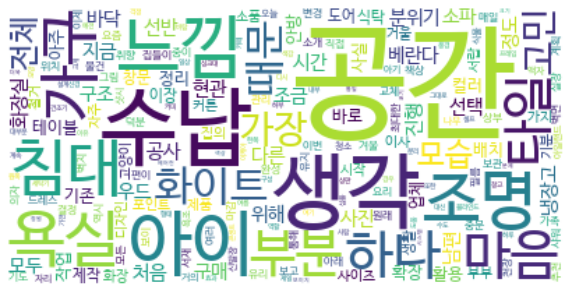

In [33]:
# colormap 글씨색 설정 가능, img_mask, mask 모양 설정
# img_mask = np.array(Image.open("heart.png"))
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      # colormap = "Accent_r", 
                      # mask = img_mask, 
                      random_state = 20, 
                      max_words = 200).generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")        
plt.axis("off")

plt.savefig("result_weebtoon.png")
plt.show()

### END